In [4]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json

In [5]:
with open('../Dataset/train/_annotations.coco.json','r') as file:
    data = json.load(file)

for img in data['images'][:10]:
    print(img['file_name'])

2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg
2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg
2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg
2777_jpg.rf.3b60ea7f7e70552e70e41528052018bd.jpg
2860_jpg.rf.3bb87fa4f938af5abfb1e17676ec1dad.jpg
2161_jpg.rf.3be4125d1ffe011c0ed462d9fe0d2152.jpg
2265_jpg.rf.3c62c7b8825039fab853256f9a9fe141.jpg
1491_jpg.rf.3c658e83538de0fa5a3f4e13d7d85f12.jpg
1385_jpg.rf.3c67cb92e2922dba0e6dba86f69df40b.jpg
2534_jpg.rf.3c8c86666860368d46b8f7bcd95ac220.jpg


In [7]:
with open('../Dataset/valid/_annotations.coco.json','r') as file:
    data = json.load(file)

for img in data['annotations'][:10]:
    print(img['segmentation']) # segmentation or bbox

[[218.75, 300, 116.25, 300, 116.25, 443.75, 218.75, 443.75, 218.75, 300]]
[[380, 326.25, 235, 326.25, 235, 475, 380, 475, 380, 326.25]]
[[410, 245, 291.25, 245, 291.25, 360, 410, 360, 410, 245]]
[[296.25, 283.75, 222.5, 283.75, 222.5, 356.25, 296.25, 356.25, 296.25, 283.75]]
[[385, 161.25, 202.5, 161.25, 202.5, 523.75, 385, 523.75, 385, 161.25]]
[[350, 193.75, 278.75, 193.75, 278.75, 325, 350, 325, 350, 193.75]]
[[335, 285, 275, 285, 275, 351.25, 335, 351.25, 335, 285]]
[[313.75, 267.5, 227.5, 267.5, 227.5, 348.75, 313.75, 348.75, 313.75, 267.5]]
[[447.5, 221.25, 323.75, 221.25, 323.75, 306.25, 447.5, 306.25, 447.5, 221.25]]
[[282.5, 401.25, 217.5, 401.25, 217.5, 472.5, 282.5, 472.5, 282.5, 401.25]]


In [8]:
# print the overall structure
def print_structure (d, indent=0):
    if isinstance(d,dict):
        for key , value in d.items():
            print(' ' * indent + str(key))
            print_structure(value,indent+1)
    elif isinstance(d, list):
        print(' ' * indent + "list of length {} containing : ".format(len(d)))
        if d:
            print_structure(d[0],indent+1) # only print the structure of the first item

with open('../Dataset/valid/_annotations.coco.json','r') as file:
    data = json.load(file)

print_structure(data)

info
 year
 version
 description
 contributor
 url
 date_created
licenses
 list of length 1 containing : 
  id
  url
  name
categories
 list of length 3 containing : 
  id
  name
  supercategory
images
 list of length 429 containing : 
  id
  license
  file_name
  height
  width
  date_captured
annotations
 list of length 429 containing : 
  id
  image_id
  category_id
  bbox
   list of length 4 containing : 
  area
  segmentation
   list of length 1 containing : 
    list of length 10 containing : 
  iscrowd


In [13]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_image_with_annotations(ax, image, annotations, display_type='both', colors=None):
    ax.imshow(image)
    ax.axis('off')  # Turn off the axes

    # Define a default color map if none is provided
    if colors is None:
        colors = plt.cm.tab10

    for ann in annotations:
        category_id = ann['category_id']
        color = colors(category_id % 10)
        
        # Display bounding box
        if display_type in ['bbox', 'both']:
            bbox = ann['bbox']
            # print(bbox)
            rect = patches.CirclePolygon ((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
        
        # Display segmentation polygon
        if display_type in ['seg', 'both']:
            for seg in ann['segmentation']:
                poly = [(seg[i], seg[i+1]) for i in range(0, len(seg), 2)]
                # print(poly)
                polygon = patches.Polygon(poly, closed=True, edgecolor=color, fill=False)
                ax.add_patch(polygon)

def display_images_with_coco_annotations(image_paths, annotations, display_type='both', colors=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for ax, img_path in zip(axs.ravel(), image_paths):
        # Load image using OpenCV and convert it from BGR to RGB color space
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get image filename to match with annotations
        img_filename = os.path.basename(img_path)
        img_id = next(item for item in annotations['images'] if item["file_name"] == img_filename)['id']
        
        # Filter annotations for the current image
        img_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == img_id]
        
        display_image_with_annotations(ax, image, img_annotations, display_type, colors)

    plt.tight_layout()
    plt.show()

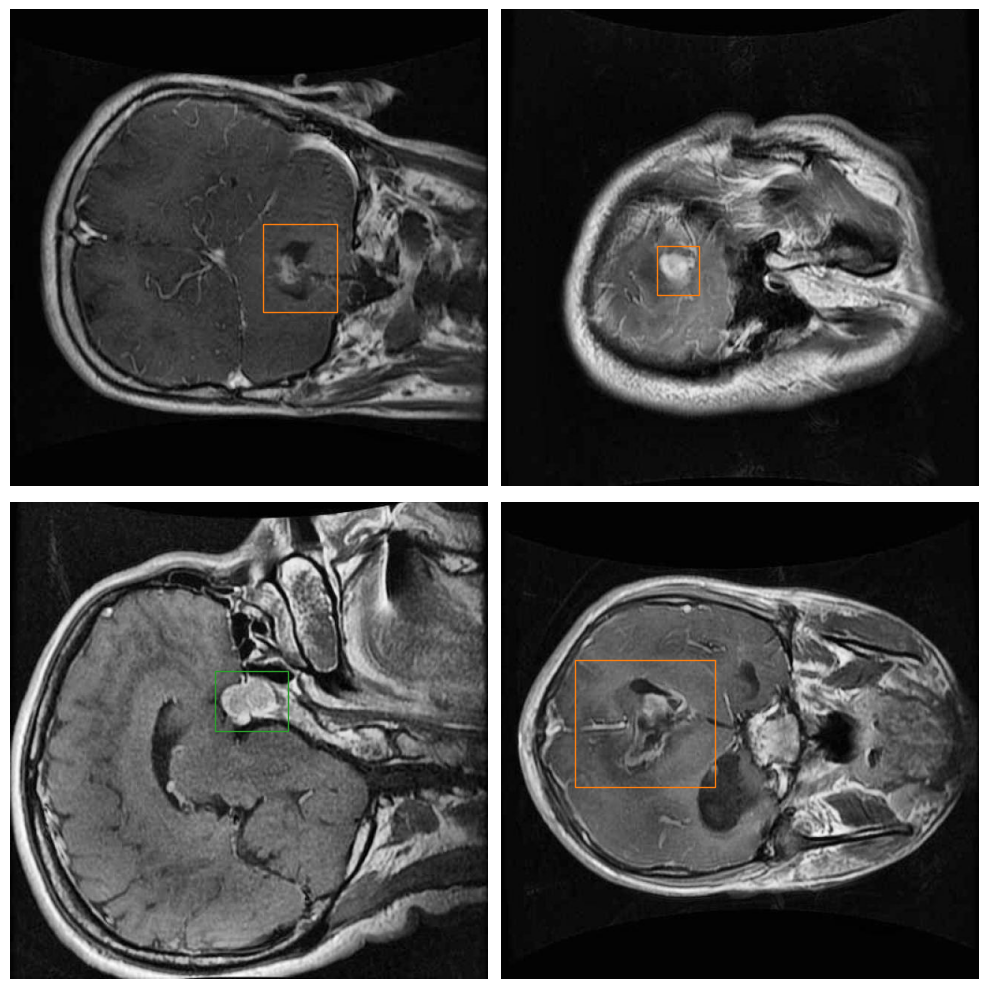

In [14]:
import random, os
with open('../Dataset/valid/_annotations.coco.json', 'r') as f:
    annotations = json.load(f)

# Get all image files
image_dir = "../Dataset/valid/"
all_image_files = [os.path.join(image_dir, img['file_name']) for img in annotations['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, annotations, display_type)